<a href="https://colab.research.google.com/github/soosmann/customer_attrition/blob/main/tuerkiye_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Türkiye is a country in which many earthquakes occure. Especially this year (2023) went through the media as a year, in which Türkiye was hit hard by earthquakes. This work examines where in general earthquake happen in Türkiye. To analyze the behaviour of earthquakes in the Turkish region, the dataset from <https://www.kaggle.com/datasets/ayyuce/turkey-earthquakes/data> is used. The dataset contains information on any earthquake from 1991-2023.

An earthquake itself comes up when the tectonic plates which the earth's crust is made of, slide on each other. Friction is created when the plates connect and can not move anymore. Because usually they are in constant movement, the forces of that movement can overcome the friction. The plates break off, the pressure is offloaded. Then an earthquake occures. The image down below presents that moment. The shown P-(primary) waves and S-(secondary) waves are seismic waves that are created when the earthquake happens. P-waves are faster than S-waves. With the time difference they arrive at seismic stations, the distance to the seismic hypocenter (the earthquake's origin) can be calculated. For further reading: <https://scienceexchange.caltech.edu/topics/earthquakes/what-causes-earthquakes>, <https://www.ardalpha.de/wissen/natur/naturgewalten/erdbeben-beben-plattentektonik-tsunami-seismische-wellen-erde-100.html>

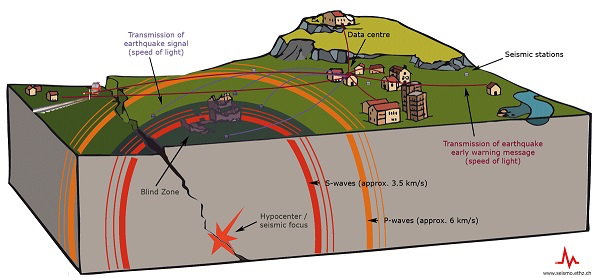

Source: https://www.kids-fun-science.com/what-is-an-earthquake.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import gdown
from google.colab import drive

Getting the dataset and displaying it's general structure. It consists of 6 columns and 19248 rows representing 19248 earthquakes.

In [2]:
output_file = "earthquakes.csv" # name of the file in colab environment
gdown.download('https://drive.google.com/uc?id=1bJ5DtpBHhDfgh2uT5MB7pctfzj_iX6v3', output_file, quiet=False)

df = pd.read_csv(output_file)

print(df.shape)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1bJ5DtpBHhDfgh2uT5MB7pctfzj_iX6v3
To: /content/earthquakes.csv
100%|██████████| 1.47M/1.47M [00:00<00:00, 129MB/s]

(19248, 6)


Time  Magnitude                        Place  Latitude  \
0  2023-09-04 05:26:08.839        4.8  11 km SSW of Özdere, Turkey   37.9198   
1  2023-08-29 04:58:15.305        4.8                          NaN   38.9659   
2  2023-08-27 03:09:43.247        4.4  9 km NNW of Émponas, Greece   36.3079   
3  2023-08-24 05:35:24.510        4.8                          NaN   38.2125   
4  2023-08-23 08:19:30.701        4.3               eastern Turkey   39.2741   

   Longitude   Depth  
0    27.0744  10.000  
1    32.9248   7.489  
2    27.8301  69.004  
3    38.1815  10.000  
4    40.3563  10.000

Getting the datatypes of the columns.

In [3]:
df.dtypes

Time          object
Magnitude    float64
Place         object
Latitude     float64
Longitude    float64
Depth        float64
dtype: object

The meanings of the columns are explained here:

Variable      |Type      |Meaning
:----------   |:---------|:------------------------------------
**Time**      | datetime | The point in time the earthquake happened
**Magnitude** | float    | Strength of the earthquake measured on Richter Scale (values 0-10)
**Place**     | object     | Description of where the earthquake happened
**Latitude**  | float    | Coordinate of Latitude on earth (vertical axis)
**Longitude** | float    | Coordinate of Longitude on earth (horizontal axis)
**Depth**     | float    | How many kilometers under the surface did the earthquake happen?

The following code shows that there some earthquakes that have no values for the magnitude on Richter Scale and the verbal place description.

In [4]:
df.isna().sum()

Time            0
Magnitude    1762
Place          32
Latitude        0
Longitude       0
Depth           0
dtype: int64

# Explorative Analisis

In this chapter, some general analysis of the given data is performed.

Here, the distribution of the earthquakes magnitudes are displayed in a histogram. The magnitude is measured with the Richter Scale which assigns values from 0 to 10 to each earthquake that was captured. The image down below shows the effects of the earthquakes with the given magnigtudes.

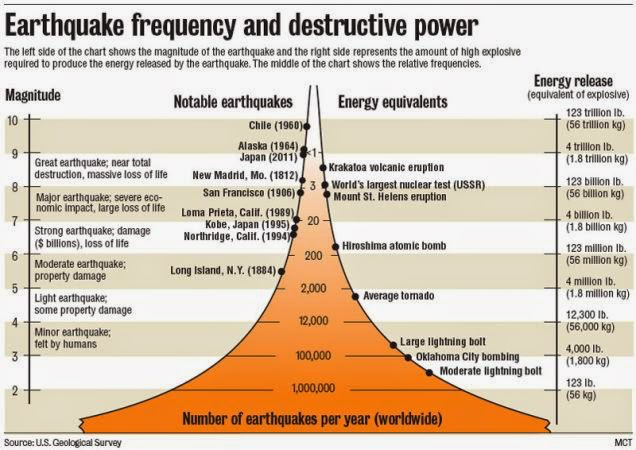

Source: <https://www.geologyin.com/2015/01/using-richter-scale-to-measure.html>

The plot itself shows that the most earthquakes in Türkiye have values between 2 and 5. All earthquakes below the value 4 cause no recognizable damage. Although it seems like there are almost no earthquakes with values over 5, it is mentionable that those earthquakes cause the most damage. Having even a small number of those can be devastating.

Text(0.5, 1.0, 'Magnitude of Earthquakes on Richter Scale')

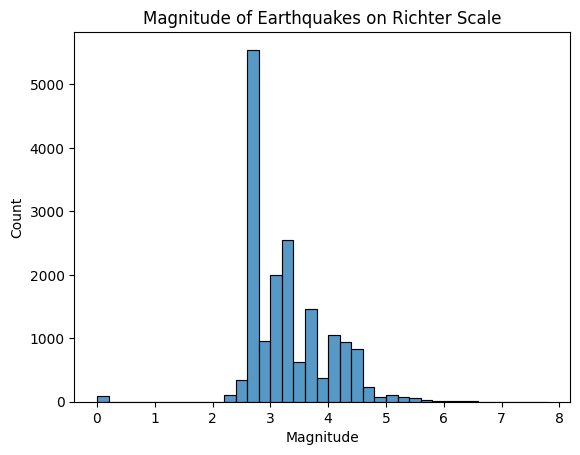

In [5]:
sns.histplot(x=df['Magnitude'], binwidth=0.2)
plt.title("Magnitude of Earthquakes on Richter Scale")

Strongest and weakest earthquake magnitude scores.

In [6]:
print("Strongest Turkish earthquake on Richter Scale: ", np.max(df["Magnitude"]))
print("Weakest Turkish earthquake on Richter Scale: ", np.min(df["Magnitude"]))

Strongest Turkish earthquake on Richter Scale:  7.8
Weakest Turkish earthquake on Richter Scale:  0.0


According to the dataset the most devastating earthquake was the big earthquake that happened in this year's (2023) February (<https://en.wikipedia.org/wiki/2023_Turkey%E2%80%93Syria_earthquakes>).

In [7]:
most_devastating_earthquake_index = df.index[df['Magnitude'] == np.max(df["Magnitude"])] # index where max(Magnitude) == df[Magnitude]
df.iloc[most_devastating_earthquake_index]

Time  Magnitude  \
616  2023-02-06 01:17:34.342        7.8   

                                                 Place  Latitude  Longitude  \
616  Pazarcik earthquake, Kahramanmaras earthquake ...   37.2256    37.0143   

     Depth  
616   10.0

This histogram shows the depth of the earthquakes. The meaning of depth refers to where the earthquake was actually triggered. This point is somewhere below the surface in the earth's crust. How much distance this location has to the earth's surface is saved as the depth.

The plot at hand shows that many earthquakes are not too far away from the surface (just a few kilomenters). After 30km below the surface the counts strongly decrease. Only some are 175km below the surface.

Text(0.5, 1.0, 'Depth of Turkish Earthquakes')

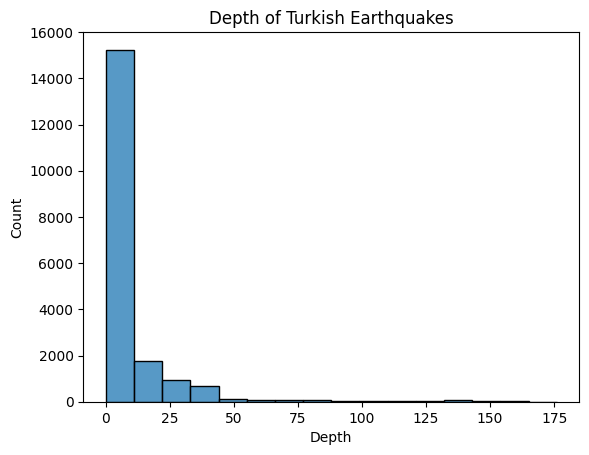

In [8]:
sns.histplot(x=df['Depth'])
plt.title("Depth of Turkish Earthquakes")

The resulting question is if the depth of an earthquake has effects on it's magnitude. The scatterplot plots the depth of each earthquake against it's magnitude. The most dots (each representing one earthquake) are at the left hand side and positioned in the middle on this vertical axis. It means that the most earthquakes have a small depths but still have a solid magnitude (between 2-5). Some earthquakes with small depths have even higher magnitudes. The more one goes to the right, the less powerful the earthquakes become. As a result one can say that earthquakes with lower depth have more potential to be extremely devastating.

Text(0.5, 1.0, 'Plotting Depth against Magnitude')

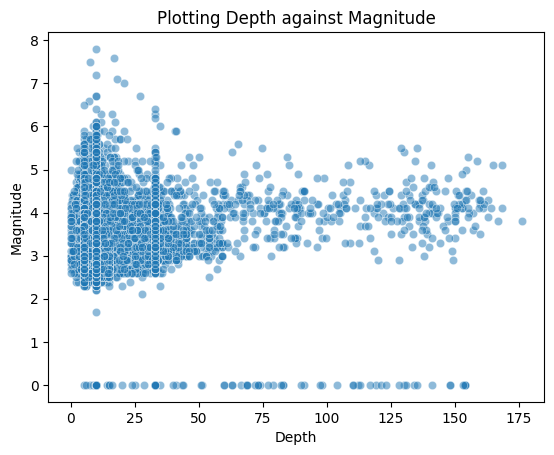

In [9]:
sns.scatterplot(data=df, x="Depth", y="Magnitude", alpha=0.5)
plt.title("Plotting Depth against Magnitude")

Here the amounts of earthquakes per year are displayed. Before creating the plot, the "Time" has to be preprocessed to have a proper dateformat. Then the dates are counted by their year.

The resulting plot shows that the amount of earthquakes decreased over the last decades. The most earthquakes happend in the 90's. After that there often were less than 500 earthquakes each year. There still were some outliers. 2023 seems to be an outlier, too.

Text(0, 0.5, 'Amount of Earthquakes')

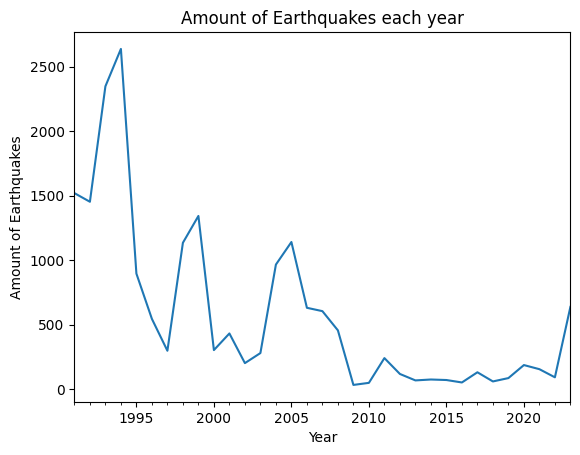

In [10]:
df['Time'] = pd.to_datetime(df['Time'])
yearly_counts = df.set_index('Time', inplace=False).resample('Y').size()

yearly_counts.plot()
plt.title("Amount of Earthquakes each year")
plt.xlabel("Year")
plt.ylabel("Amount of Earthquakes")

# Distribution of Earthquakes in Türkiye

In this part of the analysis maps of Türkiye and it's earthquakes should be created.

Probably earthquakes occure close to the tectonic plates which lie below Türkiye.

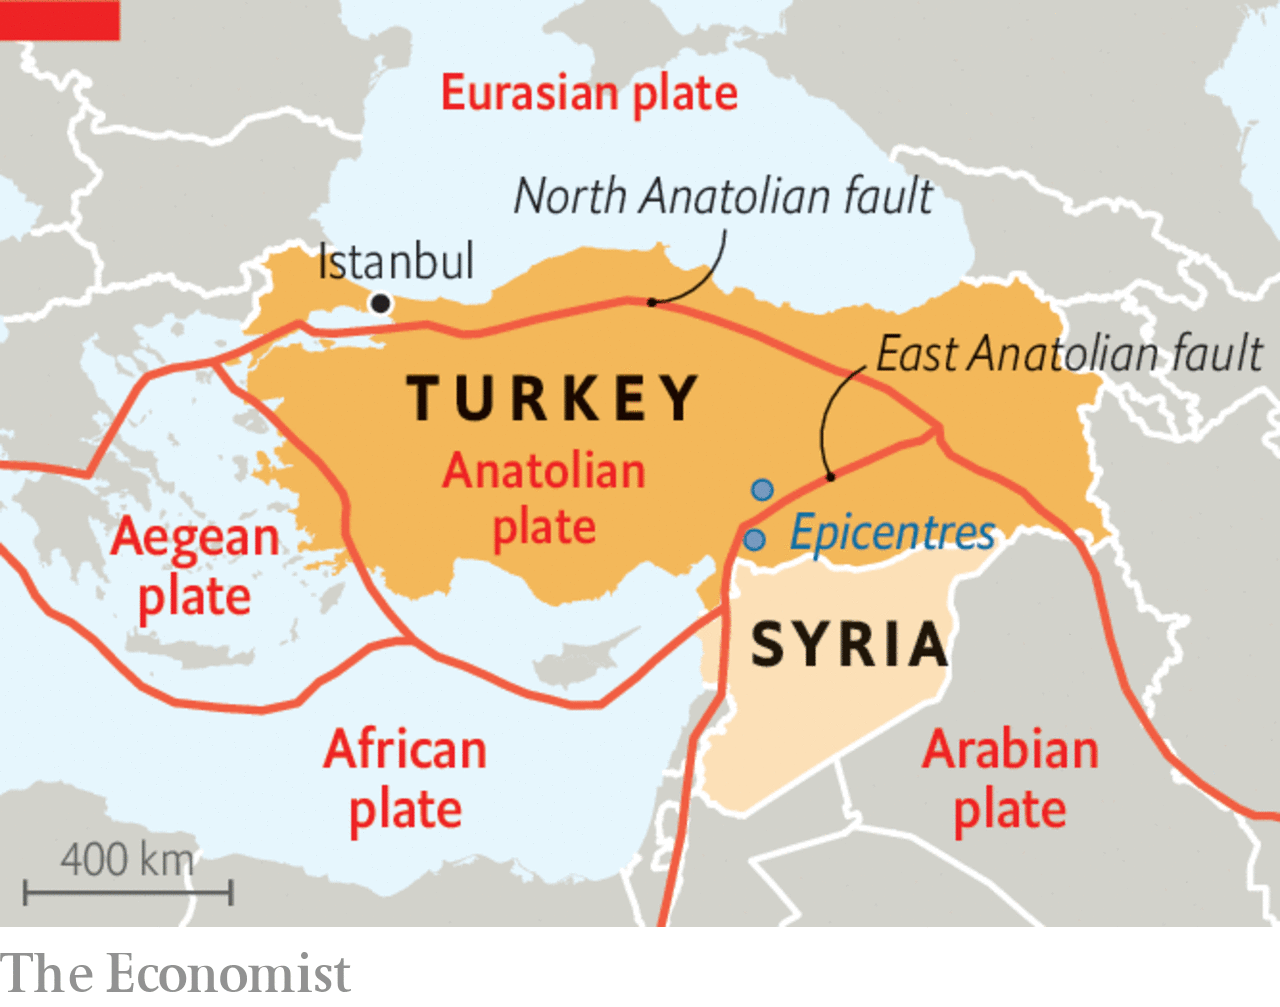

Source: <https://www.economist.com/the-economist-explains/2023/02/06/what-made-the-earthquake-in-turkey-and-syria-so-deadly>

In [11]:
import geopandas

To create a map of Türkiye, a GeoJSON file is downloaded which contains information on how to create the provinces of Türkiye. This file is converted to GeoPandas Dataframe to be able to work with it.

In [12]:
türkiye = geopandas.read_file("https://raw.githubusercontent.com/alpers/Turkey-Maps-GeoJSON/master/tr-cities.json")
türkiye.head(10)

name  number                                           geometry
0     Adana       1  MULTIPOLYGON (((35.27903 36.64069, 35.28181 36...
1  Adıyaman       2  POLYGON ((38.65534 38.09172, 38.85888 38.09243...
2     Afyon       3  POLYGON ((31.36277 39.16468, 31.38636 39.11867...
3      Ağrı       4  POLYGON ((43.39566 39.92580, 43.39423 39.79461...
4   Aksaray      68  POLYGON ((34.20521 38.84115, 34.26257 38.79367...
5    Amasya       5  POLYGON ((35.70255 40.87732, 35.84056 40.86433...
6    Ankara       6  POLYGON ((33.18796 40.41365, 33.22099 40.35125...
7   Antalya       7  MULTIPOLYGON (((29.63903 36.12125, 29.64570 36...
8   Ardahan      75  POLYGON ((42.76288 41.58437, 42.83631 41.58284...
9    Artvin       8  POLYGON ((41.58961 41.51330, 41.65495 41.48361...

Türkiye can be plotted now. Fortunatly, longitude and latitude are correct.

(35.5, 42.5)

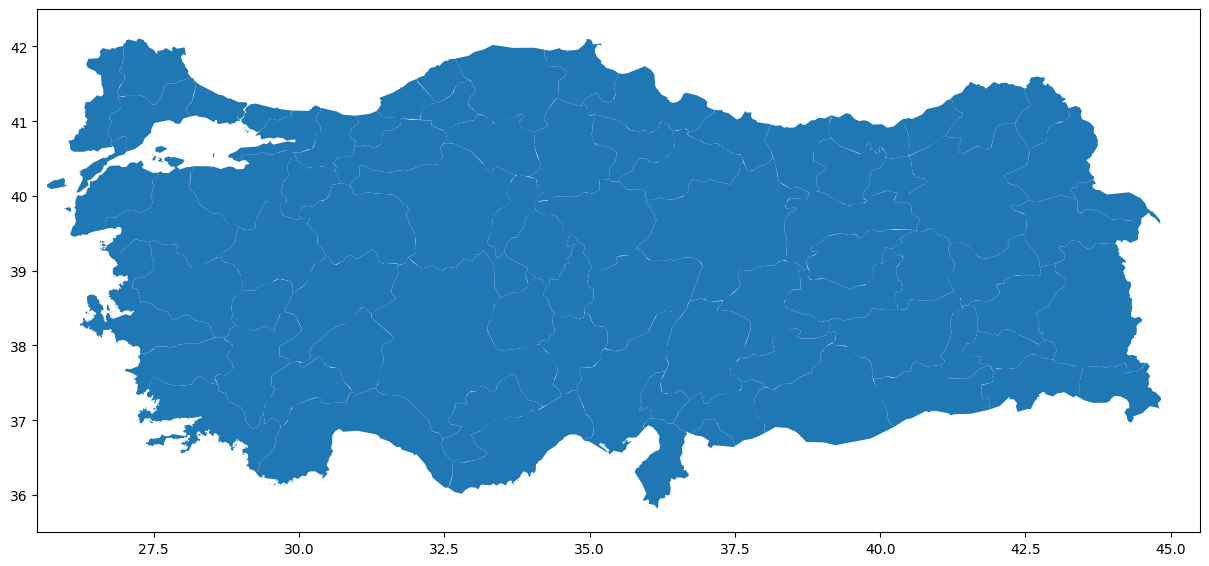

In [13]:
türkiye.plot(figsize=(15, 10))
plt.xlim(25.5, 45.5)
plt.ylim(35.5, 42.5)

Here, the coordinates of the earthquakes in Türkiye are plotted. Every dot is one earthquake. This plot will be layed over the Turkish map to see where the earthquakes were.

(35.5, 42.5)

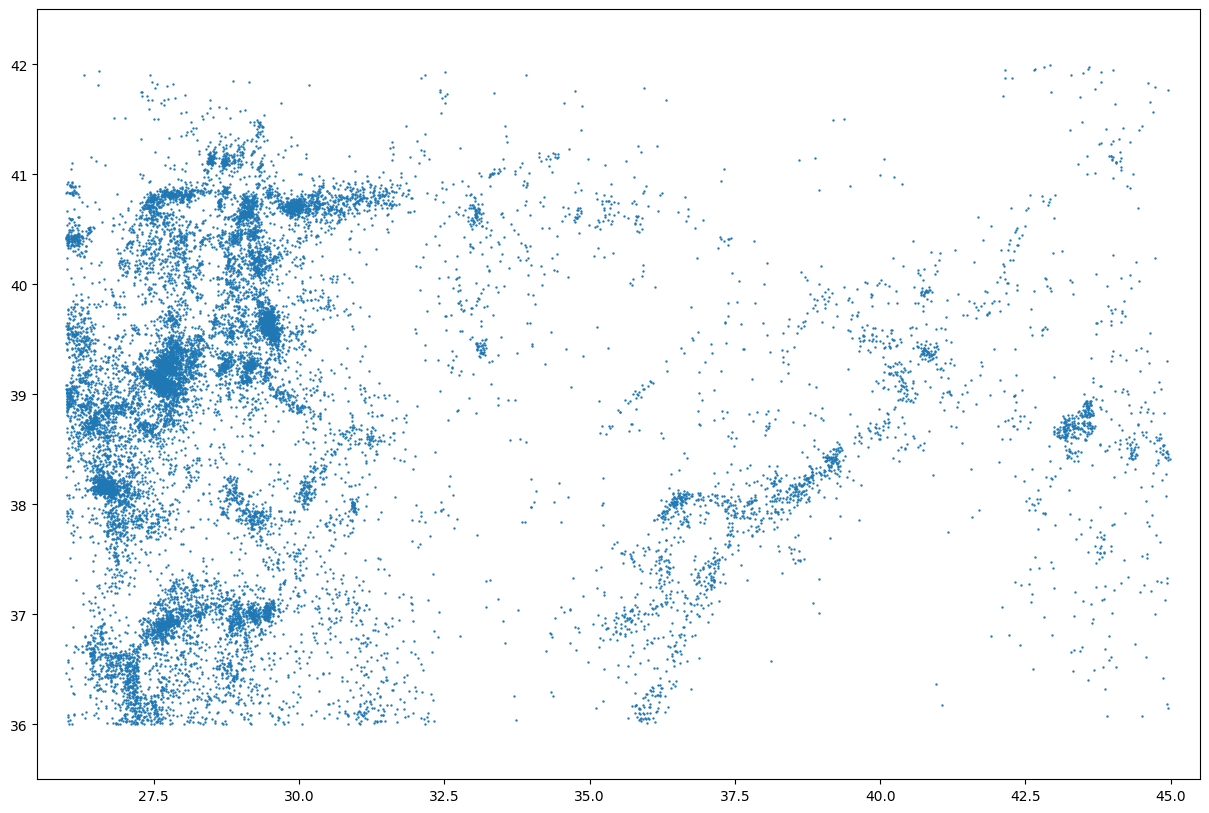

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(x=df["Longitude"], y=df["Latitude"], s=0.5)
plt.xlim(25.5, 45.5)
plt.ylim(35.5, 42.5)

Having a look at this plot, it is visible, where earthquakes occure. The most earthquakes occure in western Türkiye. But also in the center of the country such catastrophies can occure.

Text(0.5, 1.0, 'Earthquakes in Türkiye')

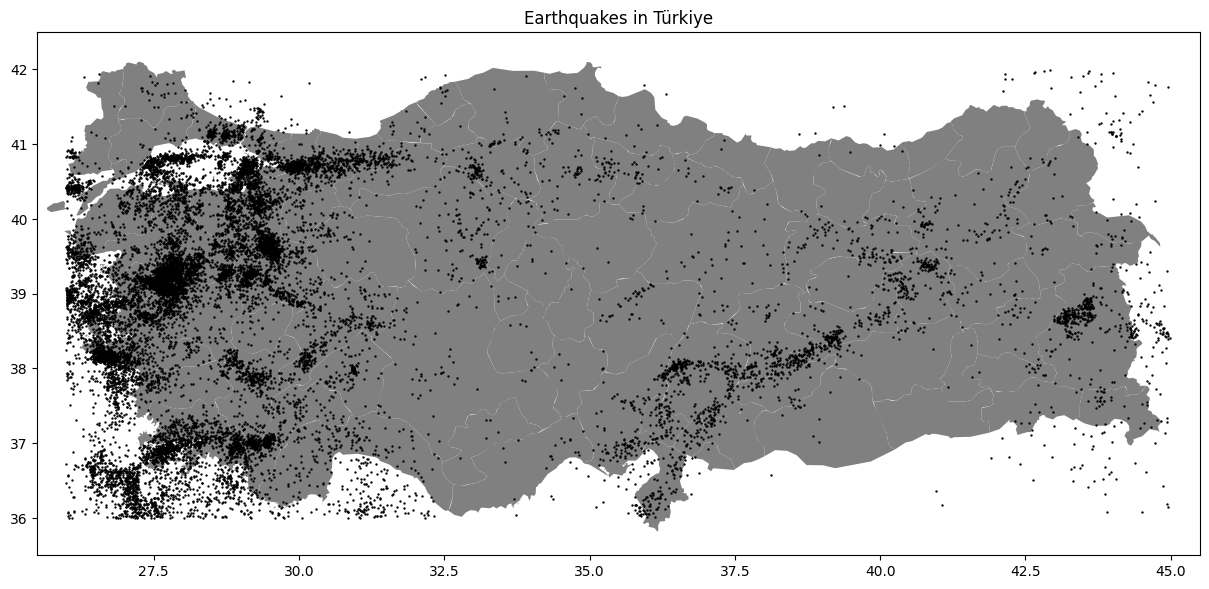

In [15]:
türkiye.plot(figsize=(15, 10), color="grey")
plt.scatter(x=df["Longitude"], y=df["Latitude"], s=0.5, c="black")
plt.xlim(25.5, 45.5)
plt.ylim(35.5, 42.5)
plt.title("Earthquakes in Türkiye")

The plot above does not show too well, where earthquakes agglomerations are. This plot down below should provide information about that and should elaborate on the previous view. Main seismic activities happen on the western side, probably because of the Aegean plate and the Anatolian plate. There are many seismic hypocentres below some of the biggest cities in Türkiye, for example Istanbul or Izmir. Seismic activities can also be found in the south and in the west of Türkiye, probably because of the colision of the Anatolian plate with the Arabic plate.

Text(0.5, 1.0, 'Possible Seismic Focus Hypocentre')

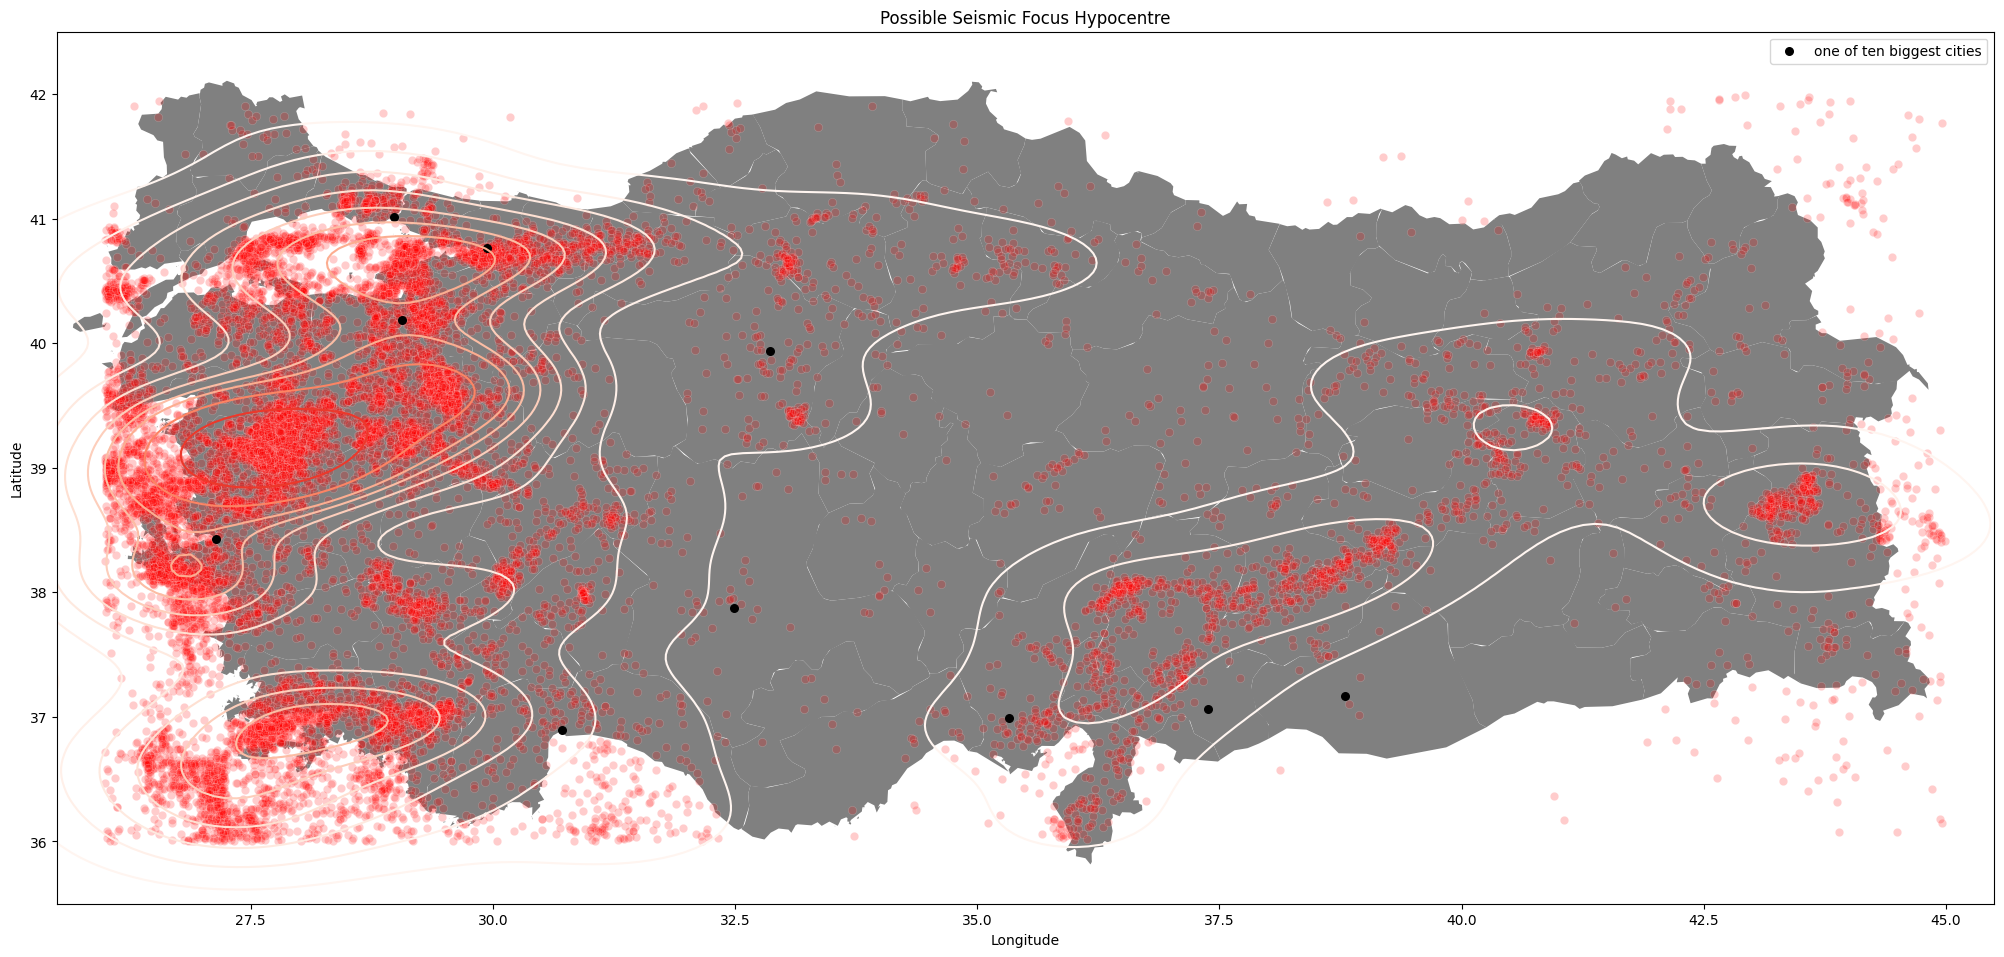

In [16]:
türkiye.plot(figsize=(25, 20), color="grey")
sns.scatterplot(
    x="Longitude",
    y="Latitude",
    data=df,
    color='red',
    alpha=0.2
)
sns.kdeplot(
    x="Longitude",
    y="Latitude",
    data=df,
    cmap="Reds"
)
plt.scatter( # coordinates of ten biggest cities in Türkiye from biggest to smallest: Istanbul, Ankara, Izmir, Bursa, Antalya, Konya, Adana, Sanliurfa, Gaziantep, Kocaeli
    x=[28.9784, 32.8597, 27.1428, 29.0610, 30.7133, 32.4932, 35.3308, 38.7955, 37.3781, 29.9408],
    y=[41.0082, 39.9334, 38.4237, 40.1885, 36.8969, 37.8746, 36.9914, 37.1674, 37.0660, 40.7654],
    s=30,
    c="black",
    label="one of ten biggest cities")
plt.xlim(25.5, 45.5)
plt.ylim(35.5, 42.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Possible Seismic Focus Hypocentre")

This map expands the first map by the magnitude of the earthquakes. It is represented by the color of the points. The darker the point, the stronger the earthquake. Earthquakes without magnitude value are not displayed. Interestingly, earthquakes on the western side have a higher magnitude (darker points). Especially in the south, the points get darker (Richter Scale between 5 and 6). In the east, these values are not that high. There, many values are between 2 and 4. It is striking that everywhere on the map are some single dark (almost black) points, representing devastating earthquakes. Critical earthquakes can happen everywhere.

Text(0.5, 1.0, 'Earthquakes and their Strength in Türkiye')

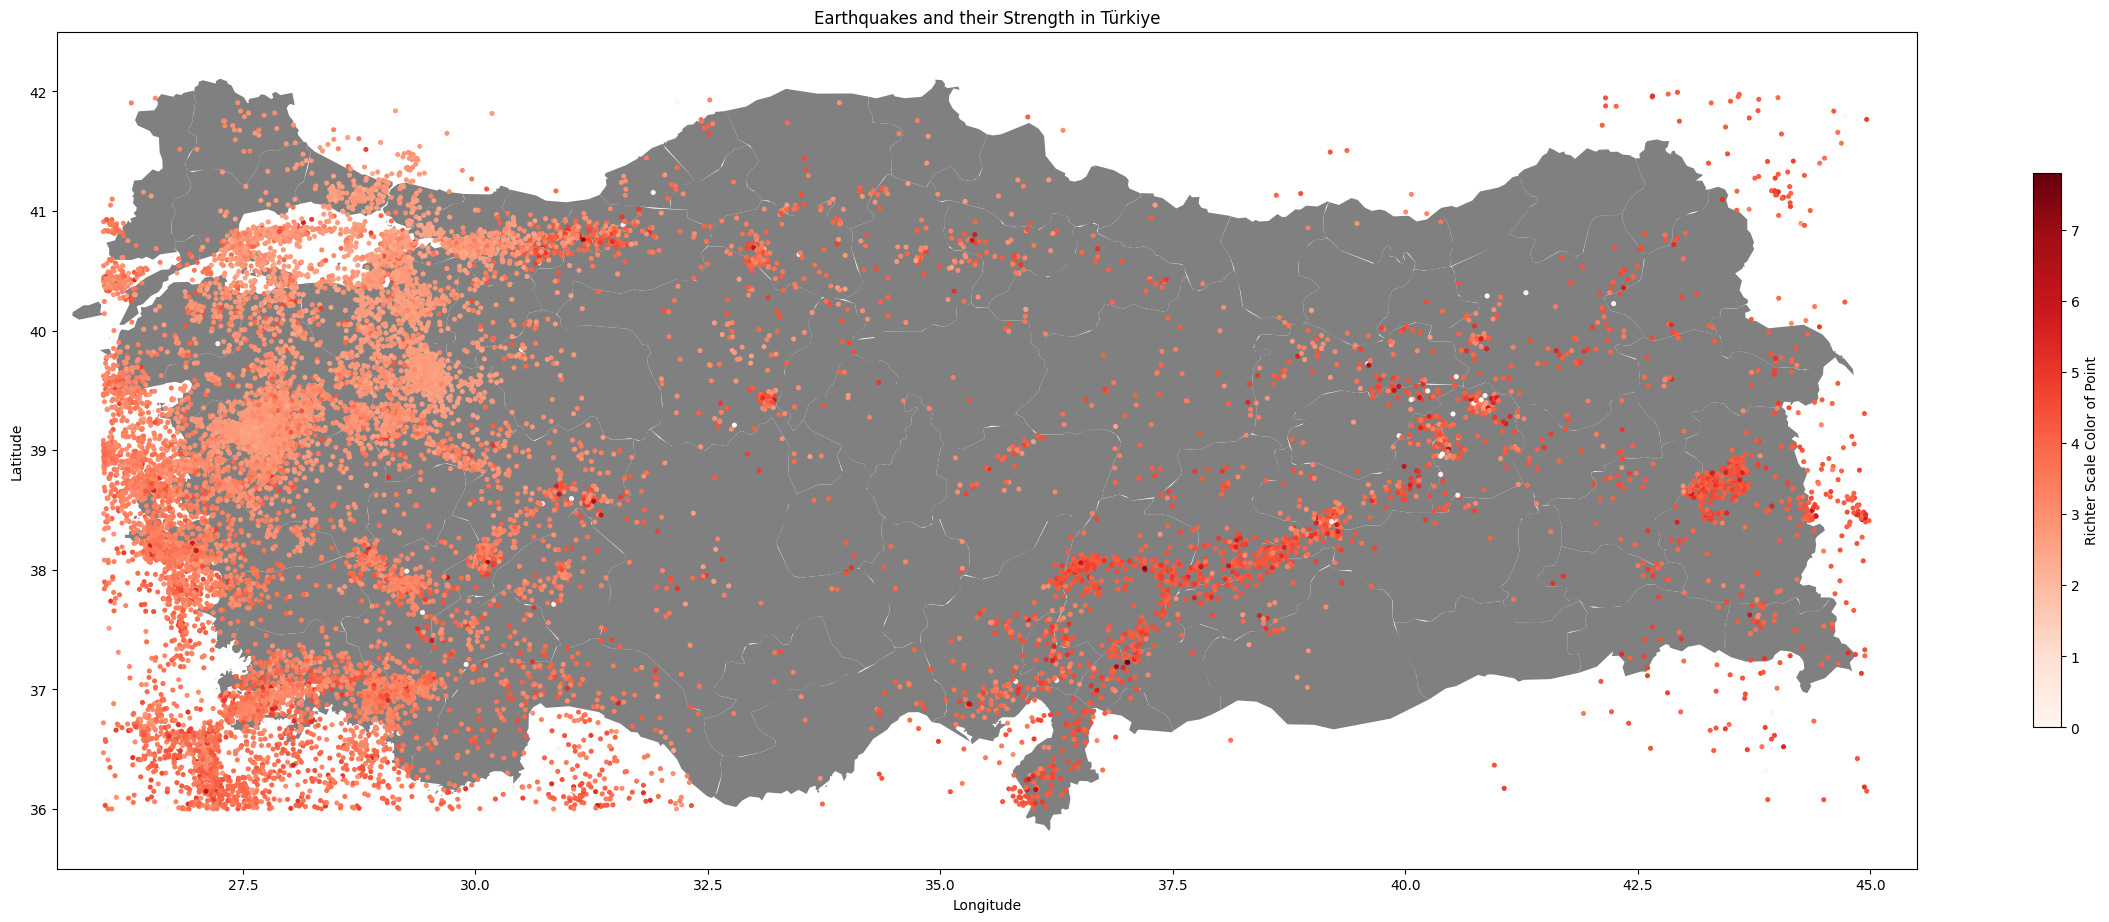

In [17]:
türkiye.plot(figsize=(30, 24), color="grey")
plt.scatter(
    x=df["Longitude"],
    y=df["Latitude"],
    c=df["Magnitude"],
    s=7,
    #alpha=0.5,
    cmap=plt.colormaps["Reds"],
    label="Earthquake")
colorbar = plt.colorbar(shrink=0.3)
colorbar.set_label('Richter Scale Color of Point')
plt.xlim(25.5, 45.5)
plt.ylim(35.5, 42.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquakes and their Strength in Türkiye")

Here, the points are colorized by the depth in which the origin of the earthquake lies. Brown points indicate almost no depth, white and blue values indicate high depths. As already found out in explorative analysis, many earthquakes appeared close to the earth's surface. This can also be seen here. Almost everywhere are earthquakes that have deeper origin. In the south-west, many earthquakes have their origin in locations deeper than 100km. This may be because the seismic activity is under water and the surface is not covered my land. But also in some regions covered by land, earthquakes occure approximately 100km below the surface.

Text(0.5, 1.0, 'Earthquakes and their Depth in Türkiye')

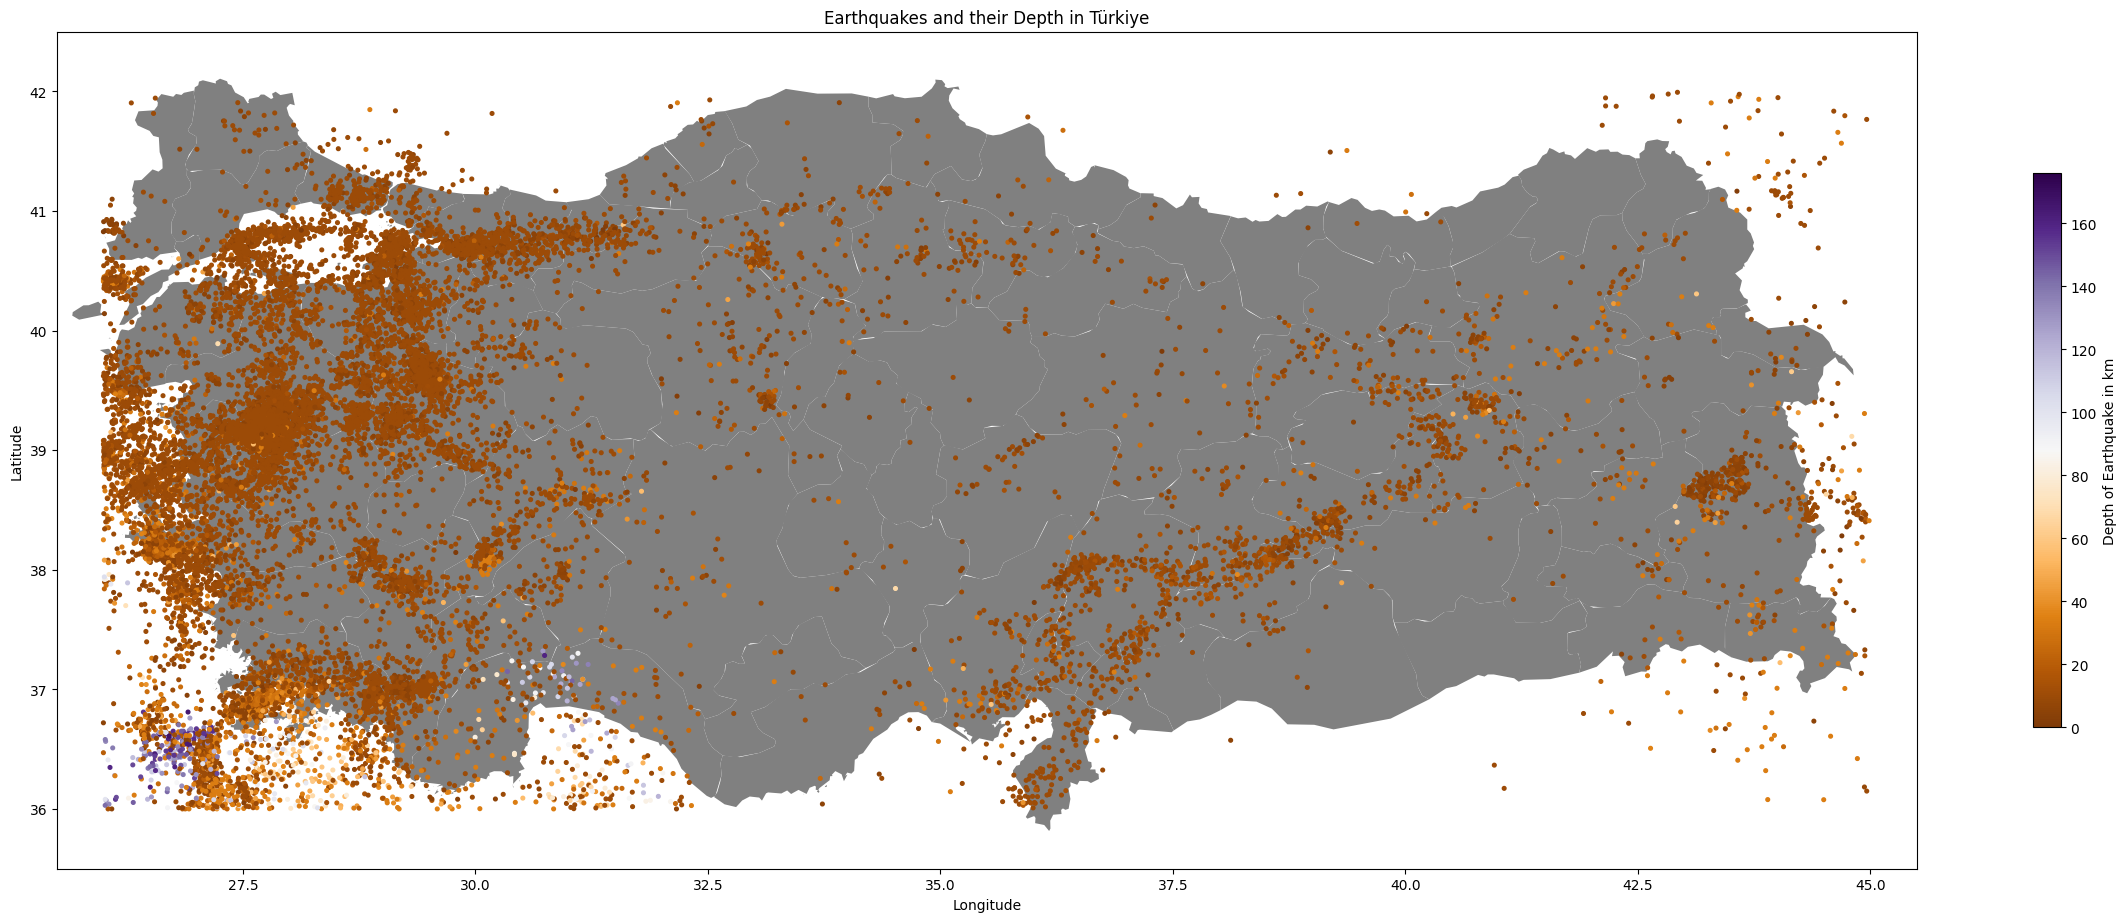

In [18]:
türkiye.plot(figsize=(30, 24), color="grey")
plt.scatter(
    x=df["Longitude"],
    y=df["Latitude"],
    c=df["Depth"],
    s=7,
    #alpha=0.5,
    cmap=plt.colormaps["PuOr"],
    label="Earthquake")
colorbar = plt.colorbar(shrink=0.3)
colorbar.set_label('Depth of Earthquake in km')
plt.xlim(25.5, 45.5)
plt.ylim(35.5, 42.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquakes and their Depth in Türkiye")

# Map for all Earthquakes at Timestamp

In this section, an interactive map is constructed, that displays every earthquake at a selected timestamp.

In [19]:
import folium
from ipywidgets import interact

Creating the map that is originated in Türkiye. *update_map()* updates this map, depending on the timestamp that is selected. The function filters the data by the given timestamp and places a circle for each earthquake that happened at or before the selected time.

In [20]:
m = folium.Map(location=[40, 34], zoom_start=7, control_scale=False, zoom_control=False, no_touch=True) # creating map that is originated in Türkiye

def update_map(selected_date): # function for updating map pins
    selected_date = pd.Timestamp(selected_date)

    filtered_data = df[df['Time'] <= selected_date] # get earthquake before and at timestamp

    for layer in m._children: # remove all previous circles because map is still existing and not replaced
        if isinstance(layer, folium.map.Marker):
            m.remove_layer(layer)

    for index, row in filtered_data.iterrows(): # add circle for each earthquake
        folium.Circle(location=[row['Latitude'], row['Longitude']], radius=2).add_to(m)

Defining the range of dates to be selectable. Monthly intervals are given.

In [21]:
start_date = pd.Timestamp('1991-01-01')
end_date = pd.Timestamp('2024-01-01')

date_range = pd.date_range(start_date, end_date, freq='M')
date_strings = [date.strftime("%m / %Y") for date in date_range]

This code creates a dropdown that allows to select a month and a year. When a new timestamp is selected, *upgrade_map()* is executed that performs the map upgrade.

**When selecting a new month, the map down below has to be refreshed. This probably has to be done manually. One would have to download that notebook and execute the code cell that displays the map. Anyone an idea of how to trigger a map update automatically?**

In [22]:
print("Select a month and a year to which all previous earthquakes should be displayed:")
interact(update_map, selected_date=date_strings[12])

Select a month and a year to which all previous earthquakes should be displayed:


interactive(children=(Text(value='01 / 1992', description='selected_date'), Output()), _dom_classes=('widget-i…

<function __main__.update_map(selected_date)>

This is the map that displays the earthquake that occured.

In [23]:
display(m)

# Conclusion

To conclude, it can be said, that everywhere in Türkiye earthquakes can happen. Türkiye has a special geographical location that makes it vulnerable by earthquakes because in it's territory many tectonical plates are located.
The most devastating earthquakes happen in the south of Türkiye but can generally happen everywhere. The most earthquakes occure on the western side of Türkiye but many of them dont cause much damage because of its low magnitude. Turkish earthquakes mostly happen not too far away from the earth's surface. The amount of earthquakes decreased but already this year (2023) more earthquakes than usual occured.